# 🎲 Analiza igre Lucky Six

## 🔍 Tema

**Analiza verovatnoće i povrata igraču (RTP) u igri Lucky Six uz mogućnost algoritamske kontrole dobitaka.**

U ovom radu bavićemo se statističko-matematičkom analizom igre Lucky Six, sa posebnim fokusom na:

- Računanje verovatnoće dobitka
- Računanje očekivanog povraćaja igraču (RTP – Return To Player)
- Razmatranje mogućnosti kontrole šanse za dobitak algoritamskim putem (AI pristup)

---

## 🧩 Pravila igre – Osnovna verzija Lucky Six

Lucky Six je loto-igra u kojoj:

- Od ukupno **48 brojeva**, slučajno se izvlači **35**
- Igrač bira **6 brojeva**
- Tiket se smatra dobitnim **samo ako svih 6 izabranih brojeva bude među 35 izvučenih**
- Važna je **pozicija** na kojoj je izvučen poslednji (šesti) pogodak – ona određuje isplatu (kvotu)

---

### 🧮 Sistem kvota

Kvota se određuje na osnovu toga kada je izvučen šesti (poslednji pogođeni) broj.  
Prvih 5 pozicija se **ne računaju** – kvote važe **od 6. do 35. mesta**:

| Pozicija | Kvota | Pozicija | Kvota | Pozicija | Kvota | Pozicija | Kvota | Pozicija | Kvota | Pozicija | Kvota |
|----------|--------|----------|--------|----------|--------|----------|--------|----------|--------|----------|--------|
| 6        | 10000  | 11       | 500    | 16       | 90     | 21       | 40     | 26       | 10     | 31       | 5      |
| 7        | 7500   | 12       | 300    | 17       | 80     | 22       | 30     | 27       | 9      | 32       | 4      |
| 8        | 5000   | 13       | 200    | 18       | 70     | 23       | 25     | 28       | 8      | 33       | 3      |
| 9        | 2500   | 14       | 150    | 19       | 60     | 24       | 20     | 29       | 7      | 34       | 2      |
| 10       | 1000   | 15       | 100    | 20       | 50     | 25       | 15     | 30       | 6      | 35       | 1      |

---

## 🎯 Ciljevi analize

1. Matematički izračunati ukupnu verovatnoću da tiket bude dobitan (6/6 u 35)
2. Računati verovatnoću da šesti broj bude izvučen na pozicijama 6–35
3. Pomnožiti svaku od tih verovatnoća sa odgovarajućom kvotom (→ doprinos RTP-u)
4. Sabiranjem dobijamo **teorijski RTP** – tj. prosečni povraćaj igraču
5. Diskutovati o uticaju algoritamskog izbora brojeva na umanjivanje šansi igrača

---

> Napomena: Ova analiza se bazira na **osnovnoj verziji igre Lucky Six**, bez dodatnih pravila, multiplikatora i bonus isplata koje se mogu javiti u drugim varijantama igre.

---

## 🎯 Verovatnoća da tiket bude dobitan

U igri **Lucky Six**, igrač bira **6 različitih brojeva od ukupno 48**, dok se nasumično izvlači **35 brojeva**.

Da bi tiket bio **dobitan**, svih 6 brojeva koje je igrač izabrao moraju se **pojaviti među izvučenih 35** (redosled nije bitan).

---

### 📌 Kako se računa verovatnoća?

Radi se o **hipergeometrijskoj verovatnoći**, gde želimo da svih 6 "pogodaka" bude u uzorku od 35 brojeva.

Ukupno postoji:
- \\( \binom{48}{35} \\) načina da se izvuče 35 brojeva od 48
- \\( \binom{42}{29} \\) načina da se preostalih 29 brojeva od 35 popune brojevima koji **nisu naši** (jer imamo 42 broja koja nismo izabrali)

Tako da važi:

\\[
P(\text{dobitak}) = \frac{\binom{6}{6} \cdot \binom{42}{29}}{\binom{48}{35}} = \frac{\binom{42}{29}}{\binom{48}{35}}
\\]

---

### 📌 Objašnjenje:

- Brojevi koje **nismo izabrali**: 48 - 6 = 42
- Izvlači se ukupno 35 brojeva
- Ako 6 naših brojeva bude u tih 35, onda ostalih **29 mesta** mora popuniti 42 broja koje **nismo izabrali**
- Zato gledamo kombinaciju \\( \binom{42}{29} \\)

---

### ✅ Računanje daje:

\\[
P = \frac{\binom{42}{29}}{\binom{48}{35}} \approx 0.132271 \quad \text{(odnosno 13.23\%)}
\\]

To znači da je **verovatnoća da tiket bude dobitan ≈ 13.23%**, odnosno da je otprilike **1 u 7.56 tiketa dobitan**.

In [1]:
from math import comb

# Brojevi iz igre
ukupno_brojeva = 48
izvucenih_brojeva = 35
igrac_brojeva = 6
ostalih_brojeva = ukupno_brojeva - igrac_brojeva  # 42
ostalih_mesta = izvucenih_brojeva - igrac_brojeva  # 29

# Verovatnoća
verovatnoca = comb(ostalih_brojeva, ostalih_mesta) / comb(ukupno_brojeva, izvucenih_brojeva)

print(f"🎯 Verovatnoća dobitka (6 od 6 u 35 izvučenih): {verovatnoca:.6f} ({verovatnoca * 100:.4f}%)")

🎯 Verovatnoća dobitka (6 od 6 u 35 izvučenih): 0.132271 (13.2271%)


---

## 🎯 Verovatnoća da **poslednji broj sa tiketa** izađe na tačnoj poziciji (od 6 do 35)

Dobitak se određuje na osnovu **pozicije na kojoj izađe poslednji (šesti)** od izabranih brojeva – tj. **najkasnije izvučenog** iz vaših 6 brojeva.

---

### 📌 Cilj

Želimo da izračunamo za svaku poziciju `k` (od 6 do 35):

> **Koja je verovatnoća da poslednji broj sa tiketa izađe tačno na `k`-toj poziciji?**

---

### 🔍 Matematička osnova

Za zadatu poziciju `k`, verovatnoća se računa po formuli:

\\[
P(k) = \frac{\binom{k-1}{5}}{\binom{48}{6}}
\\]

Gde je:
- \\( \binom{k-1}{5} \\) broj načina da **ostalih 5 brojeva** budu među prvih \\( k - 1 \\) izvučenih,
- poslednji (šesti) broj mora doći tačno kao \\( k \\)-ti izvučeni broj,
- \\( \binom{48}{6} \\) ukupan broj mogućih tiketa (kombinacija 6 od 48 brojeva).

---

### 🧠 Ukupna verovatnoća dobitka

Ako saberemo sve verovatnoće \\( P(k) \\) za pozicije od **6 do 35**, dobijamo ukupnu verovatnoću da tiket bude dobitan, što iznosi:

\\[
\sum_{k=6}^{35} P(k) \approx 13.23\%
\\]

---

🔜 Sledeći korak: prikazati sve pojedinačne verovatnoće u tabeli i vizualizovati ih grafički (u Python kodu).


    Pozicija  Verovatnoća (%)
0          6         0.000008
1          7         0.000049
2          8         0.000171
3          9         0.000456
4         10         0.001027
5         11         0.002054
6         12         0.003765
7         13         0.006454
8         14         0.010488
9         15         0.016314
10        16         0.024471
11        17         0.035595
12        18         0.050426
13        19         0.069820
14        20         0.094756
15        21         0.126341
16        22         0.165823
17        23         0.214595
18        24         0.274204
19        25         0.346363
20        26         0.432954
21        27         0.536038
22        28         0.657865
23        29         0.800879
24        30         0.967729
25        31         1.161275
26        32         1.384597
27        33         1.641004
28        34         1.934040
29        35         2.267496

🎯 Ukupna verovatnoća da tiket bude dobitan: 13.2271%


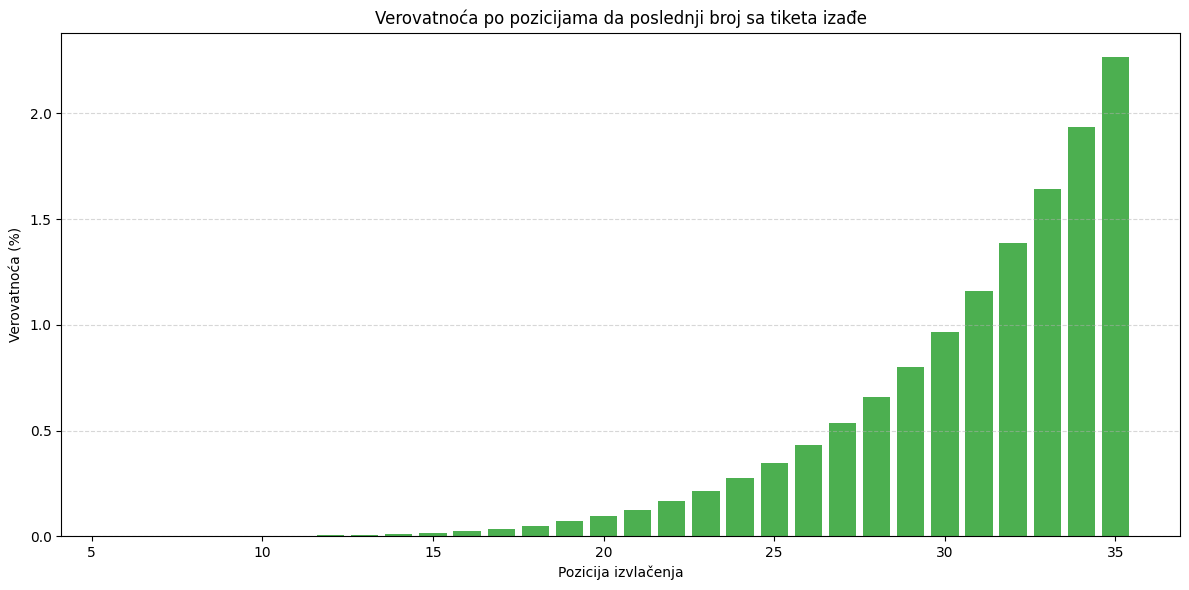

In [2]:
from math import comb
import pandas as pd
import matplotlib.pyplot as plt

# Ukupan broj brojeva i brojeva na tiketu
n = 48
k_tiket = 6

# Ukupan broj mogućih kombinacija tiketa
ukupno_kombinacija = comb(n, k_tiket)

# Računanje verovatnoće po pozicijama (6 do 35)
pozicije = list(range(6, 36))
verovatnoce = []

for k in pozicije:
    broj_kombinacija = comb(k - 1, 5)  # 5 od prvih k-1
    verovatnoca = broj_kombinacija / ukupno_kombinacija
    verovatnoce.append(verovatnoca)

# Prikaz u DataFrame-u
df = pd.DataFrame({
    "Pozicija": pozicije,
    "Verovatnoća (%)": [round(v * 100, 6) for v in verovatnoce]
})

# Ukupna verovatnoća
ukupno = sum(verovatnoce) * 100

print(df)
print(f"\n🎯 Ukupna verovatnoća da tiket bude dobitan: {ukupno:.4f}%")

# Grafički prikaz
plt.figure(figsize=(12, 6))
plt.bar(df["Pozicija"], df["Verovatnoća (%)"], color="#4caf50")
plt.title("Verovatnoća po pozicijama da poslednji broj sa tiketa izađe")
plt.xlabel("Pozicija izvlačenja")
plt.ylabel("Verovatnoća (%)")
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

---

## 💸 Računanje RTP po pozicijama

**RTP** (Return to Player) predstavlja očekivani povrat igraču u odnosu na ulog.  
Računa se tako što se **verovatnoća dobitka na nekoj poziciji** pomnoži sa kvotom isplate za tu poziciju:

$$
\text{RTP}_{pozicija} = P(pozicija) \times \text{kvota}_{pozicija}
$$

Gde je:  
- $P(pozicija)$ — verovatnoća da **poslednji pogodak sa tiketa** padne baš na toj poziciji  
- $\text{kvota}_{pozicija}$ — isplata ako pogodak padne na toj poziciji  

---

### 📌 Primer kvota po pozicijama (osnovna verzija igre):

| Pozicija | Kvota | Pozicija | Kvota | Pozicija | Kvota | Pozicija | Kvota | Pozicija | Kvota | Pozicija | Kvota |
|----------|--------|----------|--------|----------|--------|----------|--------|----------|--------|----------|--------|
| 6        | 10000  | 11       | 500    | 16       | 90     | 21       | 40     | 26       | 10     | 31       | 5      |
| 7        | 7500   | 12       | 300    | 17       | 80     | 22       | 30     | 27       | 9      | 32       | 4      |
| 8        | 5000   | 13       | 200    | 18       | 70     | 23       | 25     | 28       | 8      | 33       | 3      |
| 9        | 2500   | 14       | 150    | 19       | 60     | 24       | 20     | 29       | 7      | 34       | 2      |
| 10       | 1000   | 15       | 100    | 20       | 50     | 25       | 15     | 30       | 6      | 35       | 1      |

> Ovo su **fiksne kvote** koje se koriste za osnovnu verziju igre Lucky Six.

---

### 🧮 Ukupni RTP

Kada znamo verovatnoće i kvote, možemo izračunati **ukupan teorijski RTP**:

$$
\text{RTP}_{ukupno} = \sum_{i=6}^{35} P(i) \times \text{kvota}_i
$$

Gde $P(i)$ predstavlja verovatnoću da poslednji pogođeni broj sa tiketa izađe baš na poziciji $i$.

Dobijeni rezultat predstavlja **procentualni povrat** koji igra teoretski vraća igračima za svaki uloženi dinar.

---

### 🎯 Napomena

- Verovatnoće $P(i)$ se izračunavaju simulacijom ili teorijski analizom svih kombinacija izlazaka brojeva.
- Na primer, ako znamo da je verovatnoća da se poslednji pogodak pojavi na poziciji 20 jednaka 0.095, i kvota za tu poziciju je 50, tada:

$$
\text{RTP}_{20} = 0.095 \times 50 = 4.75
$$

Na ovaj način računa se **doprinos svake pozicije ukupnom RTP-u**, a **zbir svih doprinosa daje finalni RTP igre**.

---


    Pozicija  Verovatnoća  Kvota   RTP (%)
0          6     0.000000  10000  0.081490
1          7     0.000000   7500  0.366703
2          8     0.000002   5000  0.855640
3          9     0.000005   2500  1.140854
4         10     0.000010   1000  1.026768
5         11     0.000021    500  1.026768
6         12     0.000038    300  1.129445
7         13     0.000065    200  1.290794
8         14     0.000105    150  1.573156
9         15     0.000163    100  1.631421
10        16     0.000245     90  2.202418
11        17     0.000356     80  2.847571
12        18     0.000504     70  3.529801
13        19     0.000698     60  4.189215
14        20     0.000948     50  4.737802
15        21     0.001263     40  5.053656
16        22     0.001658     30  4.974693
17        23     0.002146     25  5.364865
18        24     0.002742     20  5.484084
19        25     0.003464     15  5.195448
20        26     0.004330     10  4.329540
21        27     0.005360      9  4.824344
22        2

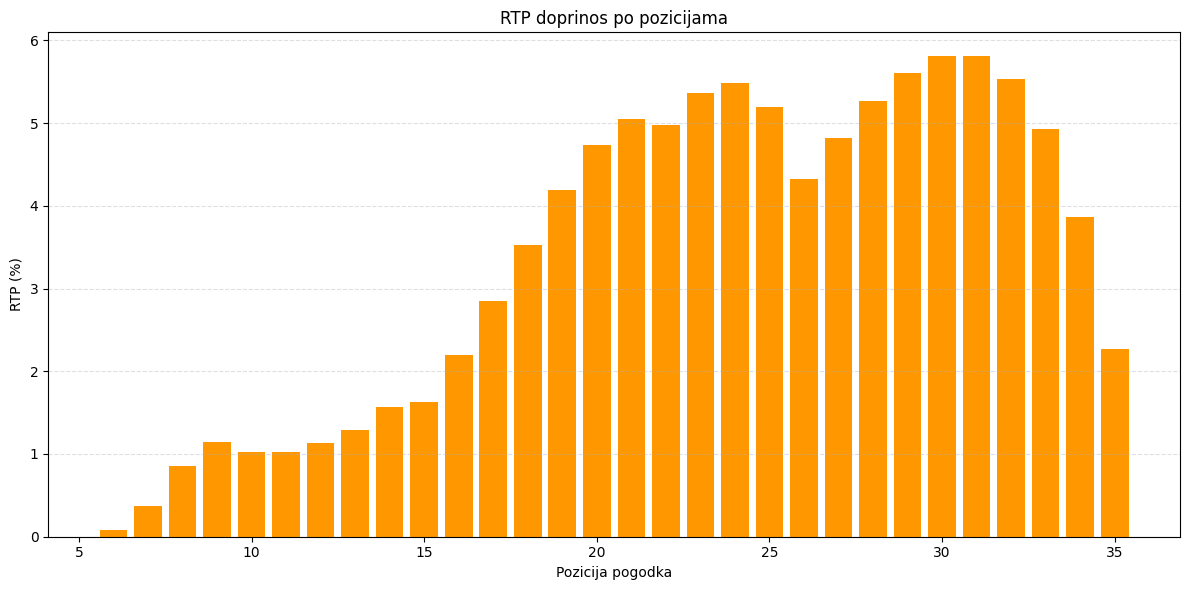

In [3]:
from math import comb
import pandas as pd
import matplotlib.pyplot as plt

# === Parametri igre ===
n = 48
k_tiket = 6
ukupno_kombinacija = comb(n, k_tiket)

# === Izračunavanje verovatnoće po pozicijama (decimalni oblik) ===
pozicije = list(range(6, 36))
verovatnoce = [comb(k - 1, 5) / ukupno_kombinacija for k in pozicije]

# === Kvote po pozicijama (fiksne) ===
kvote = {
    6: 10000, 7: 7500, 8: 5000, 9: 2500, 10: 1000,
    11: 500, 12: 300, 13: 200, 14: 150, 15: 100,
    16: 90, 17: 80, 18: 70, 19: 60, 20: 50,
    21: 40, 22: 30, 23: 25, 24: 20, 25: 15,
    26: 10, 27: 9, 28: 8, 29: 7, 30: 6,
    31: 5, 32: 4, 33: 3, 34: 2, 35: 1
}

# === Formiranje DataFrame-a ===
df = pd.DataFrame({
    "Pozicija": pozicije,
    "Verovatnoća": verovatnoce,  # decimalni oblik, npr. 0.00123
    "Kvota": [kvote[p] for p in pozicije]
})

# === Izračun RTP po pozicijama (decimalno) ===
df["RTP (%)"] = df["Verovatnoća"] * df["Kvota"] * 100  # ovde dobijamo procente

# === Ukupan RTP igre ===
rtp_total = df["RTP (%)"].sum()

# === Prikaz tabele ===
print(df[["Pozicija", "Verovatnoća", "Kvota", "RTP (%)"]].round(6))
print(f"\n🎯 Ukupan RTP igre: {rtp_total:.2f} %")

# === (Opcioni) Graf ===
plt.figure(figsize=(12, 6))
plt.bar(df["Pozicija"], df["RTP (%)"], color="#ff9800")
plt.title("RTP doprinos po pozicijama")
plt.xlabel("Pozicija pogodka")
plt.ylabel("RTP (%)")
plt.grid(True, axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

## 🎯 Zaključak osnovne matematičke analize

Na osnovu izračunatih verovatnoća i zvaničnih kvota igre **Lucky Six**, dobili smo da:

$$
\text{RTP}_{ukupno} \approx 101.94\%
$$

Što znači da **igrač u proseku dobija više nego što uloži** — matematički gledano, igra nije optimizovana u korist organizatora (kuće).

---

### 🧩 Ograničenja ove analize:
- Ova analiza se odnosi isključivo na **osnovnu verziju igre**, bez:
  - Joker brojeva
  - Jackpot mehanike
  - Bonus rundi
  - Promenljivih kvota ili limita
- Sve kvote su **fiksne** i poznate unapred, bez algoritamskih prilagođavanja

---

### 🚨 Zaključak:
U ovakvoj postavci, kuća **dugoročno gubi novac**, a igrač je matematički u blagoj prednosti.  
Zato se u praksi koristi algoritamska manipulacija ishoda (kontrola RTP-a) — što je predmet sledećeg dela projekta.


---

# 🤖 II deo: Primena veštačke inteligencije za podešavanje RTP-a u igri Lucky Six

U ovom delu projekta koristićemo pristup koji kombinuje **AI/heuristiku** sa logikom kontrole RTP-a.  
Cilj je da, nakon što više igrača odigra svoje tikete, algoritam pronađe **takav skup od 35 izvučenih brojeva**, da ukupan RTP (Return to Player) bude približno jednak **zadatoj ciljanoj vrednosti**.

---

### 🧩 Ključni koraci

1. Generišemo ili učitavamo više tiketa koje su igrači odigrali.
2. Definišemo ciljanu RTP vrednost (npr. 65%).
3. Prolazimo kroz veliki broj mogućih kombinacija brojeva koji se izvlače (od 35 brojeva).
4. Za svaku kombinaciju:
   - Računamo RTP tako što gledamo koliko je tiketa dobitno.
   - Ako je RTP dovoljno blizu ciljanoj vrednosti, prihvatamo tu kombinaciju.
5. Vraćamo najbolju kombinaciju brojeva koja zadovoljava zadati RTP.

> Na ovaj način, simuliramo ponašanje "štelovanja" igre – što je u realnosti način da sistem kontroliše isplate i optimizuje profit.

---

### 📥 Učitavanje podataka o odigranim tiketima

U ovoj sekciji možemo:
- nasumično generisati tikete (simulacija više igrača), **ili**
- učitati tikete iz fajla ako ih već imamo (CSV, Excel, itd.).

Za potrebe simulacije, koristićemo nasumično generisane tikete – svaki tiket sadrži 6 jedinstvenih brojeva od 1 do 48.

---

### 🎲 Generisanje tiketa (simulacija igrača)

Za potrebe analize, simuliraćemo više hiljada tiketa.

- Svaki tiket je lista od 6 **jedinstvenih** brojeva iz opsega 1–48.
- Brojevi se ne ponavljaju u jednom tiketu.
- Pretpostavljamo da svaki tiket ima jednak ulog (1 dinar).

Primer tiketa:

### 📊 Izračunavanje RTP-a za sve tikete

RTP (Return to Player) se računa kao:

$$
\text{RTP} = \frac{\text{Ukupna isplata svim igračima}}{\text{Ukupni ulog svih tiketa}} \times 100\%
$$

U našem modelu:
- Svaki tiket ima ulog od **30 dinara**
- Ako **svih 6 brojeva** sa tiketa izađe među 35 izvučenih, igrač dobija kvotu **X** (npr. 1000 dinara)
- Inače ne dobija ništa

U simulaciji, računa se:
- Broj pogodaka
- Ukupna isplata
- Konačni RTP

### ⚙️ Parametri:

In [27]:
# 📦 Import modula
import random
import time
import matplotlib.pyplot as plt

# ⚙️ Parametri (lako podesivi)
BROJ_IGRACA = 1000
VELICINA_IZVLACENJA = 35
TIKET_VELICINA = 6
UPLATA_PO_TIKETU = 30  # RSD
CILJANI_RTP = 60.0     # %
MAX_ITER = 2000
TOLERANCIJA = 0.1

OPSEG_BROJEVA = list(range(1, 49))

# 💰 Kvote po pozicijama
KVOTE_PO_POZICIJAMA = {
    6: 10000, 7: 7500, 8: 5000, 9: 2500, 10: 1000,
    11: 500, 12: 300, 13: 200, 14: 150, 15: 100,
    16: 90, 17: 80, 18: 70, 19: 60, 20: 50,
    21: 40, 22: 30, 23: 25, 24: 20, 25: 15,
    26: 10, 27: 9, 28: 8, 29: 7, 30: 6,
    31: 5, 32: 4, 33: 3, 34: 2, 35: 1
}

### Zajednicke Funkcije:

In [28]:
# 🎫 Generisanje tiketa
def generisi_tikete(broj_tiketa, uplata_po_tiketu):
    return [
        {"brojevi": random.sample(OPSEG_BROJEVA, TIKET_VELICINA), "uplata": uplata_po_tiketu}
        for _ in range(broj_tiketa)
    ]

# 💸 Izračunavanje RTP i statistike
def izracunaj_rtp_i_statistiku(izvuceni, tiketi):
    ukupni_dobitak = 0
    ukupni_ulog = sum(t['uplata'] for t in tiketi)
    pozicije_map = {broj: i + 1 for i, broj in enumerate(izvuceni)}
    broj_dobitnih = 0
    broj_gubitnih = 0

    for tiket in tiketi:
        brojevi = tiket['brojevi']
        if all(b in pozicije_map for b in brojevi):
            pozicije = sorted(pozicije_map[b] for b in brojevi)
            kvota = KVOTE_PO_POZICIJAMA.get(pozicije[-1], 0)
            ukupni_dobitak += kvota * tiket["uplata"]
            broj_dobitnih += 1
        else:
            broj_gubitnih += 1

    rtp = (ukupni_dobitak / ukupni_ulog) * 100
    procenat_dobitnih = (broj_dobitnih / len(tiketi)) * 100
    return rtp, ukupni_dobitak, ukupni_ulog, broj_dobitnih, broj_gubitnih, procenat_dobitnih

### 🎬 Simulacija bez AI nameštanja RTP-a:

📊 Simulacija bez štelovanja RTP-a
🎯 Izvučeni brojevi: [1, 3, 4, 5, 6, 7, 9, 11, 13, 14, 15, 16, 18, 19, 20, 22, 23, 24, 25, 26, 27, 29, 30, 31, 32, 33, 35, 36, 37, 39, 41, 43, 44, 46, 48]
💸 Ulog: 30000 RSD | Isplata: 31440.00 RSD
📈 RTP: 104.80%
🎯 Dobitni: 145 (14.50%) | ❌ Gubitni: 855


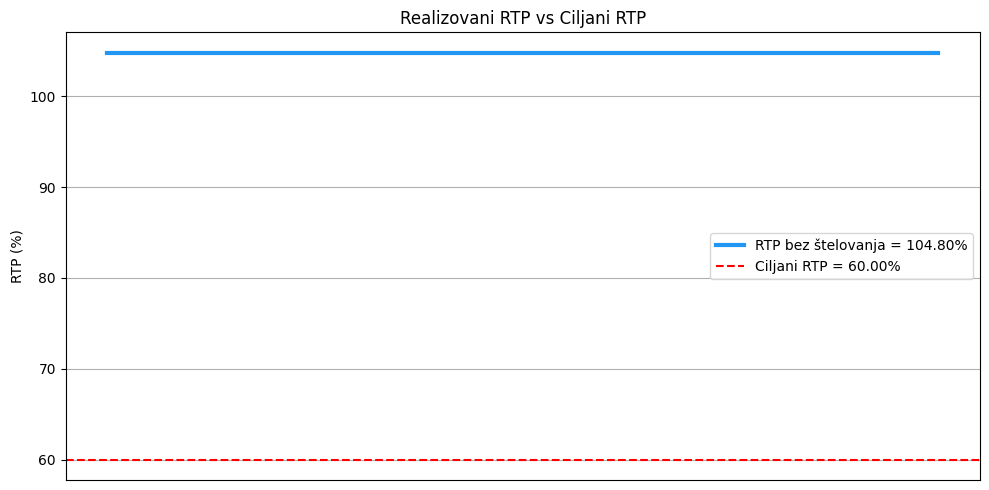

In [30]:
# 🎬 Pokretanje bez nameštanja
tiketi = generisi_tikete(BROJ_IGRACA, UPLATA_PO_TIKETU)
izvuceni = random.sample(OPSEG_BROJEVA, VELICINA_IZVLACENJA)

rtp, dobitak, ulog, dobitni, gubitni, procenat = izracunaj_rtp_i_statistiku(izvuceni, tiketi)

# 🖨️ Tekstualni prikaz
print("📊 Simulacija bez štelovanja RTP-a")
print(f"🎯 Izvučeni brojevi: {sorted(izvuceni)}")
print(f"💸 Ulog: {ulog} RSD | Isplata: {dobitak:.2f} RSD")
print(f"📈 RTP: {rtp:.2f}%")
print(f"🎯 Dobitni: {dobitni} ({procenat:.2f}%) | ❌ Gubitni: {gubitni}")

# 📊 Graf — prikaz jedne RTP vrednosti kao linije
plt.figure(figsize=(10, 5))
plt.plot([0, 1], [rtp, rtp], label=f"RTP bez štelovanja = {rtp:.2f}%", linewidth=3, color="#2196f3")
plt.axhline(CILJANI_RTP, color='red', linestyle='--', label=f"Ciljani RTP = {CILJANI_RTP:.2f}%")
plt.title("Realizovani RTP vs Ciljani RTP")
plt.ylabel("RTP (%)")
plt.xticks([])  # nema x-ose jer nije vremenska skala
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## 🤖 AI algoritam za štelovanje RTP-a

Algoritam `ai_steluj_izvlacenje` koristi jednostavnu heurističku optimizaciju kako bi pronašao **najbolju kombinaciju 35 brojeva** iz opsega 1–48 koja daje **RTP najbliži zadatom ciljanom RTP-u**.

---

### 🔍 Kako funkcioniše algoritam?

1. **Inicijalizacija**:
   - Nasumično se izvlači 35 brojeva iz opsega `OPSEG_BROJEVA` kao početna kombinacija.
   - Izračunava se RTP te kombinacije koristeći sve prethodno generisane tikete.

2. **Optimizacija (do max_iter puta)**:
   - Dva broja u trenutnoj kombinaciji se zamene mesta (mutacija).
   - Izračuna se RTP nove kombinacije.
   - Ako nova kombinacija daje **RTP bliži ciljanom**, ona postaje nova „najbolja“.
   - Ako je razlika dovoljno mala (manja od `tolerancija`), algoritam se zaustavlja ranije.

3. **Praćenje napretka**:
   - Svi rezultati RTP-a tokom iteracija se čuvaju u listi `rtp_istorija` radi kasnije vizualizacije.

4. **Vizualizacija**:
   - Prikazuje se graf sa:
     - RTP vrednostima tokom iteracija (`RTP sa AI`)
     - horizontalnom linijom za početni RTP (`RTP bez AI`)
     - horizontalnom linijom za `CILJANI_RTP`

---

### 📌 Povratne vrednosti

Funkcija vraća:
- `najbolji`: lista 35 brojeva koje treba izvući (redosled se čuva!)
- `najbolji_rtp`: ostvareni RTP te kombinacije

---

### ✅ Cilj algoritma

Pomoću jednostavnog algoritma lokalnog pretraživanja (sličnog *Hill Climbing* metodi), AI pokušava da:

- **šteluje izvlačenje brojeva**
- **maksimizuje ili minimizuje RTP** prema potrebi operatera sistema
- i to sve na osnovu prethodno odigranih tiketa

Na ovaj način, sistem može **aktivno kontrolisati isplativost igre** u realnom vremenu, prilagođavajući RTP ciljanoj vrednosti bez direktnog menjanja pravila igre.


In [31]:
# 🤖 AI algoritam za štelovanje + upoređivanje sa originalnim RTP-om
def ai_steluj_izvlacenje(tiketi, ciljani_rtp, max_iter, tolerancija, rtp_bez_ai=None):
    start = time.time()
    izvuceni = random.sample(OPSEG_BROJEVA, VELICINA_IZVLACENJA)
    najbolji = izvuceni[:]
    najbolji_rtp, *_ = izracunaj_rtp_i_statistiku(najbolji, tiketi)
    najmanja_razlika = abs(najbolji_rtp - ciljani_rtp)
    rtp_istorija = [najbolji_rtp]

    for i in range(max_iter):
        novi = najbolji[:]
        i1, i2 = random.sample(range(VELICINA_IZVLACENJA), 2)
        novi[i1], novi[i2] = novi[i2], novi[i1]
        novi_rtp, *_ = izracunaj_rtp_i_statistiku(novi, tiketi)
        nova_razlika = abs(novi_rtp - ciljani_rtp)

        if nova_razlika < najmanja_razlika:
            najbolji = novi
            najbolji_rtp = novi_rtp
            najmanja_razlika = nova_razlika
            rtp_istorija.append(najbolji_rtp)
            if najmanja_razlika <= tolerancija:
                break
        elif i % 100 == 0:
            rtp_istorija.append(najbolji_rtp)

    trajanje = time.time() - start
    _, dobitak, ulog, dobitni, gubitni, procenat = izracunaj_rtp_i_statistiku(najbolji, tiketi)

    # 📈 Prikaz grafa
    plt.figure(figsize=(10, 5))
    plt.plot(rtp_istorija, label="RTP sa AI", color="#4caf50", linewidth=2)
    if rtp_bez_ai is not None:
        plt.axhline(rtp_bez_ai, color='#2196f3', linestyle='-', linewidth=2, label=f"RTP bez AI ({rtp_bez_ai:.2f}%)")
    plt.axhline(ciljani_rtp, color='red', linestyle='--', label=f"Ciljani RTP ({ciljani_rtp:.2f}%)")

    for idx, rtp in enumerate(rtp_istorija):
        if idx % (max_iter // 10 + 1) == 0:  # Povremeno ispisujemo vrednosti radi preglednosti
            plt.text(idx, rtp + 0.5, f"{rtp:.2f}%", fontsize=8, ha='center', va='bottom')

    plt.title("Uporedni prikaz RTP-a (bez AI vs sa AI)")
    plt.xlabel("Iteracije")
    plt.ylabel("RTP (%)")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

    # 🖨️ Statistika
    print("🤖 AI simulacija sa štelovanjem RTP-a")
    print(f"⏱️ Trajanje: {trajanje:.2f} s | Iteracija: {i+1}")
    print(f"💸 Ulog: {ulog} RSD | Isplata: {dobitak:.2f} RSD")
    print(f"📈 RTP: {najbolji_rtp:.2f}%")
    print(f"🎯 Dobitni: {dobitni} ({procenat:.2f}%) | ❌ Gubitni: {gubitni}")

    return najbolji, najbolji_rtp

### 🤖🎬 Pokretanje AI simulacije:

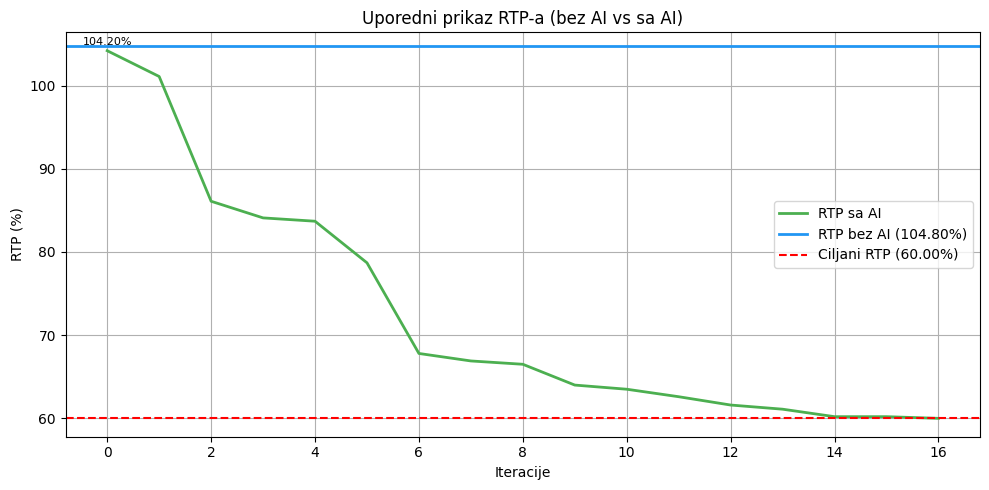

🤖 AI simulacija sa štelovanjem RTP-a
⏱️ Trajanje: 0.13 s | Iteracija: 112
💸 Ulog: 30000 RSD | Isplata: 18000.00 RSD
📈 RTP: 60.00%
🎯 Dobitni: 132 (13.20%) | ❌ Gubitni: 868


In [32]:
# 🧠 Pokretanje AI štelovanja
najbolji_brojevi, najbolji_rtp = ai_steluj_izvlacenje(
    tiketi=tiketi,
    ciljani_rtp=CILJANI_RTP,
    max_iter=MAX_ITER,
    tolerancija=TOLERANCIJA,
    rtp_bez_ai=rtp  # prosleđujemo prethodni RTP radi upoređivanja
)

# Optimizacija RTP pomoću izbacivanja najčešćih brojeva iz izvlačenja

---

## 🎯 Cilj

U ovoj fazi projekta želimo dodatno smanjiti broj dobitnih tiketa i smanjiti RTP tako što **izbacujemo najčešće brojeve sa tiketa iz izvlačenja**. 

---

## 🧩 Logika

1. **Analiza tiketa**: Izračunavamo koliko se svaki broj pojavljuje u svim odigranim tiketima.

2. **Identifikacija najčešćih brojeva**: Izaberemo 10 najčešćih brojeva koji će biti potpuno izbačeni iz izvlačenja.

3. **Filtriranje izvlačenja**: Prilikom generisanja izvlačenja (35 brojeva) izbegavamo izvlačenje bilo kog od tih izbačenih brojeva.

4. **AI optimizacija**: Na ostatak brojeva se primenjuje heuristički algoritam za slaganje izvlačenja u skladu sa ciljanom vrednošću RTP.

---

## 🛠️ Detalji implementacije

- Funkcija `izbaci_najcesce_brojeve` prebrojava frekvencije brojeva u tiketima i vraća najčešćih 10 brojeva za izbacivanje.

- Funkcija `napravi_tezinsku_listu_sa_izbacenim` pravi listu brojeva i njihove težine (verovatnoće) za izvlačenje, **isključujući izbačene brojeve**.

- Funkcija `simuliraj_izvlacenje_tezinama_sa_izbacenim` izvlači 35 brojeva iz te filtrirane liste.

- U AI algoritmu se prilikom svake iteracije proverava da li novi niz izvlačenja sadrži neki od izbačenih brojeva, i takav niz se odbacuje.

---

## 📊 Efekat

Izbacivanjem najčešćih brojeva sa tiketa automatski se smanjuje broj dobitnih tiketa, što omogućava značajniju kontrolu i snižavanje RTP.

---

## ⚙️ Parametri koje možeš menjati

- `broj_izbacenih`: koliko najčešćih brojeva da se izuzme iz izvlačenja (npr. 10).

- `obrnuto_tezinama`: da li se koristi težinska distribucija gde manje česti brojevi dobijaju veće šanse (ako želiš još niži RTP).

- `max_iter` i `tolerancija`: parametri AI optimizacije.

---

## 🧪 Testiranje i analiza

Nakon pokretanja algoritma, biće prikazan:

- Vreme izvršavanja i broj iteracija.

- Graf koji prikazuje kako RTP evoluira tokom optimizacije.

- Statistika o ukupnoj uloženoj i isplaćenoj sumi.

- Broj dobitnih i gubitnih tiketa i njihov procenat.

- Koji su brojevi izbačeni iz izvlačenja.




Prekid nakon 778 iteracija, RTP je 50.00%


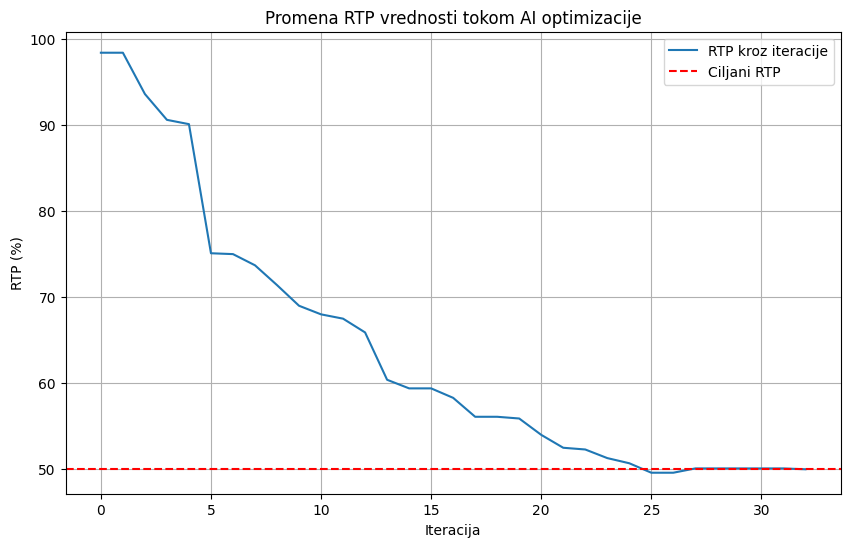

⏳ Vreme izvršavanja: 0.76 sekundi
🔄 Broj iteracija: 778
💰 Ukupno uloženo: 30000 RSD
💸 Ukupno isplaćeno: 15000.00 RSD
📈 Realizovani RTP: 50.00%
🎯 Broj dobitnih tiketa: 121 (12.10%)
❌ Broj gubitnih tiketa: 879
🚫 Izbačeno najčešćih brojeva: [39, 48, 44, 33, 2, 22, 17, 14, 27, 15]
🎯 Optimalni izvlačeni brojevi: [41, 43, 18, 13, 34, 40, 42, 10, 47, 31, 30, 19, 37, 36, 3, 28, 23, 38, 20, 5, 32, 4, 24, 6, 29, 16, 1, 12, 26, 7, 46, 35, 25, 45, 21]


In [34]:
import random
import time
import matplotlib.pyplot as plt
from collections import Counter

# 📌 Parametri igre (možeš ovde globalno da menjaš)
BROJ_IGRACA = 1000
VELICINA_IZVLACENJA = 35
TIKET_VELICINA = 6
UPLATA_PO_TIKETU = 30  # u RSD
CILJANI_RTP = 50.0     # ciljani RTP u procentima
OPSEG_BROJEVA = list(range(1, 49))  # brojevi od 1 do 48
BROJ_IZBACENIH = 10   # Koliko najcescih brojava se ne prikazuje

# 🎯 Kvote po pozicijama (pozicija: kvota)
KVOTE_PO_POZICIJAMA = {
     6: 10000,  7: 7500,  8: 5000,  9: 2500, 10: 1000,
    11: 500,   12: 300,  13: 200,  14: 150, 15: 100,
    16: 90,    17: 80,   18: 70,   19: 60,  20: 50,
    21: 40,    22: 30,   23: 25,   24: 20,  25: 15,
    26: 10,    27: 9,    28: 8,    29: 7,   30: 6,
    31: 5,     32: 4,    33: 3,    34: 2,   35: 1
}

# 🎫 Generisanje tiketa
def generisi_tikete(broj_tiketa, uplata_po_tiketu):
    tiketi = []
    for _ in range(broj_tiketa):
        tiket = {
            "brojevi": random.sample(OPSEG_BROJEVA, TIKET_VELICINA),
            "uplata": uplata_po_tiketu
        }
        tiketi.append(tiket)
    return tiketi

# Funkcija koja vraća listu najčešćih brojeva na tiketima koje želimo izbaciti iz izvlačenja
def izbaci_najcesce_brojeve(tiketi, broj_izbacenih):
    if broj_izbacenih <= 0:
        return []  # Ne izbacujemo ništa ako je broj 0 ili negativan
    svi_brojevi = [broj for tiket in tiketi for broj in tiket['brojevi']]
    frekvencije = Counter(svi_brojevi)
    najcesci = [broj for broj, _ in frekvencije.most_common(broj_izbacenih)]
    return najcesci

# 💸 Izračunavanje RTP, dobitnih i gubitnih tiketa
def izracunaj_rtp_i_statistiku(izvuceni, tiketi):
    ukupni_dobitak = 0
    ukupni_ulog = sum(t['uplata'] for t in tiketi)
    pozicije_map = {broj: i + 1 for i, broj in enumerate(izvuceni)}

    broj_dobitnih = 0
    broj_gubitnih = 0

    for tiket in tiketi:
        brojevi = tiket['brojevi']
        uplata = tiket['uplata']
        if all(broj in pozicije_map for broj in brojevi):
            pozicije = sorted(pozicije_map[broj] for broj in brojevi)
            poslednja_pozicija = pozicije[-1]
            kvota = KVOTE_PO_POZICIJAMA.get(poslednja_pozicija, 0)
            ukupni_dobitak += kvota * uplata
            broj_dobitnih += 1
        else:
            broj_gubitnih += 1

    rtp = (ukupni_dobitak / ukupni_ulog) * 100 if ukupni_ulog > 0 else 0
    procenat_dobitnih = (broj_dobitnih / len(tiketi)) * 100 if tiketi else 0
    return rtp, ukupni_dobitak, ukupni_ulog, broj_dobitnih, broj_gubitnih, procenat_dobitnih

# 🔄 AI algoritam sa izbacivanjem najcescih brojeva (koristi globalni BROJ_IZBACENIH)
def ai_steluj_izvlacenje(tiketi, ciljani_rtp, max_iter=20000, tolerancija=0.1):
    start_time = time.time()

    # Dobavi najcesce brojeve koje treba izbaciti
    najcesci_brojevi = izbaci_najcesce_brojeve(tiketi, BROJ_IZBACENIH)

    # Definisi dozvoljene brojeve za izvlačenje (svi osim najcescih)
    dozvoljeni_brojevi = [b for b in OPSEG_BROJEVA if b not in najcesci_brojevi]

    # Prvo nasumično izvlačenje iz dozvoljenih brojeva
    izvuceni = random.sample(dozvoljeni_brojevi, VELICINA_IZVLACENJA)
    najbolji_izvuceni = izvuceni[:]
    najbolji_rtp, _, _, _, _, _ = izracunaj_rtp_i_statistiku(izvuceni, tiketi)
    najbolja_razlika = abs(najbolji_rtp - ciljani_rtp)

    rtp_history = [najbolji_rtp]
    iteracije = 0

    for i in range(max_iter):
        iteracije = i + 1
        novi_izvuceni = izvuceni[:]
        idx1, idx2 = random.sample(range(VELICINA_IZVLACENJA), 2)
        novi_izvuceni[idx1], novi_izvuceni[idx2] = novi_izvuceni[idx2], novi_izvuceni[idx1]

        novi_rtp, _, _, _, _, _ = izracunaj_rtp_i_statistiku(novi_izvuceni, tiketi)
        nova_razlika = abs(novi_rtp - ciljani_rtp)

        if nova_razlika < najbolja_razlika:
            izvuceni = novi_izvuceni
            najbolji_rtp = novi_rtp
            najbolja_razlika = nova_razlika
            najbolji_izvuceni = novi_izvuceni
            rtp_history.append(najbolji_rtp)

            if najbolja_razlika <= tolerancija:
                print(f"Prekid nakon {iteracije} iteracija, RTP je {najbolji_rtp:.2f}%")
                break
        else:
            if i % 100 == 0:
                rtp_history.append(najbolji_rtp)

    vreme_izvrsavanja = time.time() - start_time

    # Graf evolucije RTP-a kroz iteracije
    plt.figure(figsize=(10,6))
    plt.plot(rtp_history, label="RTP kroz iteracije")
    plt.axhline(ciljani_rtp, color='red', linestyle='--', label="Ciljani RTP")
    plt.xlabel("Iteracija")
    plt.ylabel("RTP (%)")
    plt.title("Promena RTP vrednosti tokom AI optimizacije")
    plt.legend()
    plt.grid(True)
    plt.show()

    ukupni_ulog = BROJ_IGRACA * UPLATA_PO_TIKETU
    _, ukupni_dobitak, _, broj_dobitnih, broj_gubitnih, procenat_dobitnih = izracunaj_rtp_i_statistiku(najbolji_izvuceni, tiketi)

    print(f"⏳ Vreme izvršavanja: {vreme_izvrsavanja:.2f} sekundi")
    print(f"🔄 Broj iteracija: {iteracije}")
    print(f"💰 Ukupno uloženo: {ukupni_ulog} RSD")
    print(f"💸 Ukupno isplaćeno: {ukupni_dobitak:.2f} RSD")
    print(f"📈 Realizovani RTP: {najbolji_rtp:.2f}%")
    print(f"🎯 Broj dobitnih tiketa: {broj_dobitnih} ({procenat_dobitnih:.2f}%)")
    print(f"❌ Broj gubitnih tiketa: {broj_gubitnih}")
    print(f"🚫 Izbačeno najčešćih brojeva: {najcesci_brojevi}")

    return najbolji_izvuceni, najbolji_rtp

# --- Glavni tok programa ---

tiketi = generisi_tikete(BROJ_IGRACA, UPLATA_PO_TIKETU)

# Pokreni AI bez menjanja BROJ_IZBACENIH ili menjanjem globalne vrednosti gore
izvuceni_opt, rtp_opt = ai_steluj_izvlacenje(tiketi, ciljani_rtp=CILJANI_RTP, max_iter=1000, tolerancija=0.1)

print(f"🎯 Optimalni izvlačeni brojevi: {izvuceni_opt}")

---

## 💡 Ideja: Uplata kao snaga tiketa

### 🎯 Cilj
Umesto da svi tiketi imaju istu uplatu (npr. 30 RSD), svaki tiket će imati **nasumičnu uplatu u opsegu**, npr. od 30 do 500 RSD.  
Na taj način, svaki tiket ima različitu **"snagu"** — veća uplata znači veći potencijalni dobitak.

---

### ⚙️ Mehanizam

- Postavićemo opseg za uplate:
  ```python
  MIN_UPLATA = 30
  MAX_UPLATA = 500

✅ Prekid nakon 22 iteracija, RTP ≈ 50.10%


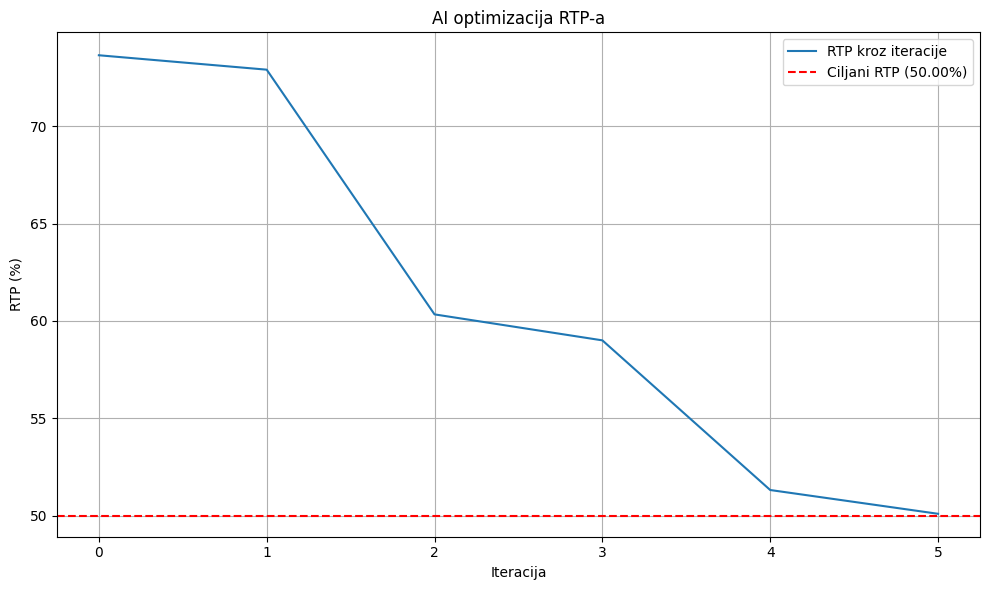

⏱️ Trajanje: 0.04 s
💰 Ukupan ulog: 256758 RSD | 💸 Isplata: 128627.00 RSD
📈 Realizovani RTP: 50.10%
🎯 Dobitni tiketi: 108 (10.80%) | ❌ Gubitni: 892
🚫 Izbačeni brojevi: [43, 18, 6, 32, 39, 37, 45, 42, 23, 19]

✅ Optimalni brojevi za izvlačenje: [41, 26, 20, 44, 46, 35, 21, 17, 36, 22, 31, 34, 4, 29, 15, 2, 30, 47, 10, 25, 7, 28, 33, 13, 16, 27, 1, 40, 3, 48, 14, 12, 24, 8, 5]


In [35]:
import random
import time
import matplotlib.pyplot as plt
from collections import Counter

# 📌 Parametri igre
BROJ_IGRACA = 1000
VELICINA_IZVLACENJA = 35
TIKET_VELICINA = 6
CILJANI_RTP = 50.0
OPSEG_BROJEVA = list(range(1, 49))
BROJ_IZBACENIH = 10

# 📌 Opseg uplate po tiketu (snaga tiketa)
MIN_UPLATA = 30
MAX_UPLATA = 500

# 🎯 Kvote po pozicijama (pozicija: kvota)
KVOTE_PO_POZICIJAMA = {
     6: 10000,  7: 7500,  8: 5000,  9: 2500, 10: 1000,
    11: 500,   12: 300,  13: 200,  14: 150, 15: 100,
    16: 90,    17: 80,   18: 70,   19: 60,  20: 50,
    21: 40,    22: 30,   23: 25,   24: 20,  25: 15,
    26: 10,    27: 9,    28: 8,    29: 7,   30: 6,
    31: 5,     32: 4,    33: 3,    34: 2,   35: 1
}

# 🎫 Generisanje tiketa sa nasumičnom uplatom
def generisi_tikete(broj_tiketa):
    return [{
        "brojevi": random.sample(OPSEG_BROJEVA, TIKET_VELICINA),
        "uplata": random.randint(MIN_UPLATA, MAX_UPLATA)
    } for _ in range(broj_tiketa)]

# 🔍 Najčešći brojevi
def izbaci_najcesce_brojeve(tiketi, broj_izbacenih):
    if broj_izbacenih <= 0:
        return []
    svi_brojevi = [broj for tiket in tiketi for broj in tiket['brojevi']]
    frekvencije = Counter(svi_brojevi)
    return [broj for broj, _ in frekvencije.most_common(broj_izbacenih)]

# 💸 Izračunavanje RTP-a
def izracunaj_rtp_i_statistiku(izvuceni, tiketi):
    ukupni_dobitak = 0
    ukupni_ulog = sum(t['uplata'] for t in tiketi)
    pozicije_map = {broj: i + 1 for i, broj in enumerate(izvuceni)}

    broj_dobitnih = 0
    broj_gubitnih = 0

    for tiket in tiketi:
        brojevi = tiket['brojevi']
        uplata = tiket['uplata']
        if all(broj in pozicije_map for broj in brojevi):
            pozicije = sorted(pozicije_map[broj] for broj in brojevi)
            poslednja_pozicija = pozicije[-1]
            kvota = KVOTE_PO_POZICIJAMA.get(poslednja_pozicija, 0)
            ukupni_dobitak += kvota * uplata
            broj_dobitnih += 1
        else:
            broj_gubitnih += 1

    rtp = (ukupni_dobitak / ukupni_ulog) * 100 if ukupni_ulog > 0 else 0
    procenat_dobitnih = (broj_dobitnih / len(tiketi)) * 100 if tiketi else 0
    return rtp, ukupni_dobitak, ukupni_ulog, broj_dobitnih, broj_gubitnih, procenat_dobitnih

# 🤖 AI algoritam
def ai_steluj_izvlacenje(tiketi, ciljani_rtp, max_iter=20000, tolerancija=0.1):
    start_time = time.time()

    najcesci_brojevi = izbaci_najcesce_brojeve(tiketi, BROJ_IZBACENIH)
    dozvoljeni_brojevi = [b for b in OPSEG_BROJEVA if b not in najcesci_brojevi]

    izvuceni = random.sample(dozvoljeni_brojevi, VELICINA_IZVLACENJA)
    najbolji_izvuceni = izvuceni[:]
    najbolji_rtp, *_ = izracunaj_rtp_i_statistiku(izvuceni, tiketi)
    najbolja_razlika = abs(najbolji_rtp - ciljani_rtp)

    rtp_history = [najbolji_rtp]

    for i in range(max_iter):
        novi = izvuceni[:]
        i1, i2 = random.sample(range(VELICINA_IZVLACENJA), 2)
        novi[i1], novi[i2] = novi[i2], novi[i1]
        novi_rtp, *_ = izracunaj_rtp_i_statistiku(novi, tiketi)
        nova_razlika = abs(novi_rtp - ciljani_rtp)

        if nova_razlika < najbolja_razlika:
            izvuceni = novi
            najbolji_rtp = novi_rtp
            najbolja_razlika = nova_razlika
            najbolji_izvuceni = novi
            rtp_history.append(najbolji_rtp)
            if najbolja_razlika <= tolerancija:
                print(f"✅ Prekid nakon {i+1} iteracija, RTP ≈ {najbolji_rtp:.2f}%")
                break
        elif i % 100 == 0:
            rtp_history.append(najbolji_rtp)

    vreme = time.time() - start_time
    _, dobitak, ulog, dob, gub, proc = izracunaj_rtp_i_statistiku(najbolji_izvuceni, tiketi)

    # 📈 Graf
    plt.figure(figsize=(10, 6))
    plt.plot(rtp_history, label="RTP kroz iteracije")
    plt.axhline(ciljani_rtp, color='red', linestyle='--', label=f"Ciljani RTP ({ciljani_rtp:.2f}%)")
    plt.xlabel("Iteracija")
    plt.ylabel("RTP (%)")
    plt.title("AI optimizacija RTP-a")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # 📊 Statistika
    print(f"⏱️ Trajanje: {vreme:.2f} s")
    print(f"💰 Ukupan ulog: {ulog} RSD | 💸 Isplata: {dobitak:.2f} RSD")
    print(f"📈 Realizovani RTP: {najbolji_rtp:.2f}%")
    print(f"🎯 Dobitni tiketi: {dob} ({proc:.2f}%) | ❌ Gubitni: {gub}")
    print(f"🚫 Izbačeni brojevi: {najcesci_brojevi}")
    print(f"\n✅ Optimalni brojevi za izvlačenje: {najbolji_izvuceni}")

    return najbolji_izvuceni, najbolji_rtp

# --- Pokretanje ---
tiketi = generisi_tikete(BROJ_IGRACA)

izvuceni_opt, rtp_opt = ai_steluj_izvlacenje(
    tiketi,
    ciljani_rtp=CILJANI_RTP,
    max_iter=1000,
    tolerancija=0.1
)


---

🔎 Pokretanje bez snage tiketa (svi kao da uplaćuju 100 RSD)...
🔎 Pokretanje sa realnom snagom tiketa (nasumične uplate)...


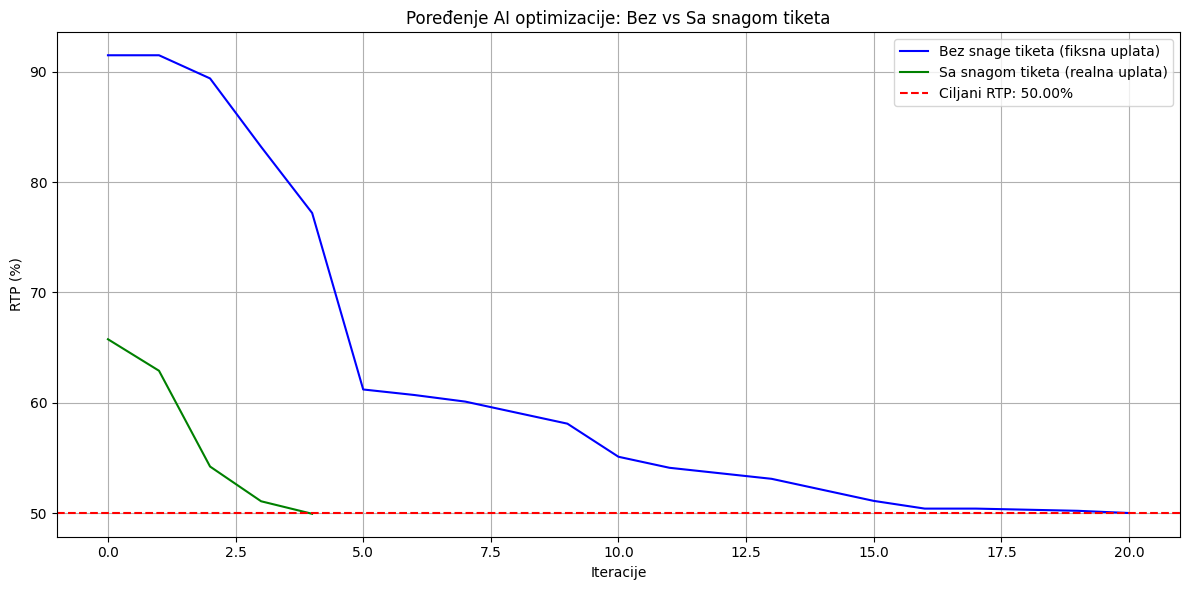

In [46]:
import random
import time
import matplotlib.pyplot as plt
from collections import Counter

# 📌 Parametri igre
BROJ_IGRACA = 1000
VELICINA_IZVLACENJA = 35
TIKET_VELICINA = 6
CILJANI_RTP = 50.0
OPSEG_BROJEVA = list(range(1, 49))
BROJ_IZBACENIH = 10

# 📌 Opseg uplate po tiketu (snaga tiketa)
MIN_UPLATA = 30
MAX_UPLATA = 500
FIKSNA_UPLATA = 100  # koristi se za eksperiment bez snage

# 🎯 Kvote po pozicijama
KVOTE_PO_POZICIJAMA = {
     6: 10000,  7: 7500,  8: 5000,  9: 2500, 10: 1000,
    11: 500,   12: 300,  13: 200,  14: 150, 15: 100,
    16: 90,    17: 80,   18: 70,   19: 60,  20: 50,
    21: 40,    22: 30,   23: 25,   24: 20,  25: 15,
    26: 10,    27: 9,    28: 8,    29: 7,   30: 6,
    31: 5,     32: 4,    33: 3,    34: 2,   35: 1
}

# 🎫 Tiketi
def generisi_tikete(broj):
    return [{
        "brojevi": random.sample(OPSEG_BROJEVA, TIKET_VELICINA),
        "uplata": random.randint(MIN_UPLATA, MAX_UPLATA)
    } for _ in range(broj)]

# 🔍 Najčešći brojevi
def izbaci_najcesce_brojeve(tiketi, broj_izbacenih):
    svi = [b for t in tiketi for b in t["brojevi"]]
    return [b for b, _ in Counter(svi).most_common(broj_izbacenih)] if broj_izbacenih > 0 else []

# 💸 RTP i statistika
def izracunaj_rtp_i_statistiku(izvuceni, tiketi, koristi_snagu=True):
    ukupni_ulog = 0
    ukupni_dobitak = 0
    pozicije_map = {broj: i + 1 for i, broj in enumerate(izvuceni)}
    dob, gub = 0, 0

    for t in tiketi:
        uplata = t["uplata"] if koristi_snagu else FIKSNA_UPLATA
        ukupni_ulog += uplata
        if all(b in pozicije_map for b in t["brojevi"]):
            pozicije = sorted(pozicije_map[b] for b in t["brojevi"])
            kvota = KVOTE_PO_POZICIJAMA.get(pozicije[-1], 0)
            ukupni_dobitak += kvota * uplata
            dob += 1
        else:
            gub += 1

    rtp = (ukupni_dobitak / ukupni_ulog) * 100 if ukupni_ulog else 0
    procenat = (dob / len(tiketi)) * 100 if tiketi else 0
    return rtp, ukupni_dobitak, ukupni_ulog, dob, gub, procenat

# 🤖 AI optimizacija
def ai_simulacija(tiketi, ciljani_rtp, koristi_snagu=True, max_iter=1000, tolerancija=0.1):
    najcesci = izbaci_najcesce_brojeve(tiketi, BROJ_IZBACENIH)
    dozvoljeni = [b for b in OPSEG_BROJEVA if b not in najcesci]

    izvuceni = random.sample(dozvoljeni, VELICINA_IZVLACENJA)
    najbolji = izvuceni[:]
    najbolji_rtp, *_ = izracunaj_rtp_i_statistiku(najbolji, tiketi, koristi_snagu)
    razlika = abs(najbolji_rtp - ciljani_rtp)
    istorija = [najbolji_rtp]

    for i in range(max_iter):
        novi = najbolji[:]
        i1, i2 = random.sample(range(VELICINA_IZVLACENJA), 2)
        novi[i1], novi[i2] = novi[i2], novi[i1]
        novi_rtp, *_ = izracunaj_rtp_i_statistiku(novi, tiketi, koristi_snagu)
        nova_razlika = abs(novi_rtp - ciljani_rtp)
        if nova_razlika < razlika:
            najbolji = novi
            najbolji_rtp = novi_rtp
            razlika = nova_razlika
            istorija.append(najbolji_rtp)
            if razlika <= tolerancija:
                break
        elif i % 100 == 0:
            istorija.append(najbolji_rtp)

    return istorija

# === 🧪 Pokretanje eksperimenta ===

print("🔎 Pokretanje bez snage tiketa (svi kao da uplaćuju 100 RSD)...")
tiketi = generisi_tikete(BROJ_IGRACA)
rtp_bez_snage = ai_simulacija(tiketi, CILJANI_RTP, koristi_snagu=False)

print("🔎 Pokretanje sa realnom snagom tiketa (nasumične uplate)...")
rtp_sa_snagom = ai_simulacija(tiketi, CILJANI_RTP, koristi_snagu=True)

# 📈 Prikaz grafa
plt.figure(figsize=(12, 6))
plt.plot(rtp_bez_snage, label="Bez snage tiketa (fiksna uplata)", color='blue')
plt.plot(rtp_sa_snagom, label="Sa snagom tiketa (realna uplata)", color='green')
plt.axhline(CILJANI_RTP, linestyle='--', color='red', label=f"Ciljani RTP: {CILJANI_RTP:.2f}%")

plt.title("Poređenje AI optimizacije: Bez vs Sa snagom tiketa")
plt.xlabel("Iteracije")
plt.ylabel("RTP (%)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()